## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with LR = 0.100000


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



50000/50000 [==============================] - 11s 225us/step - loss: 1.5649 - acc: 0.4467 - val_loss: 1.7103 - val_acc: 0.3987
Epoch 29/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.5596 - acc: 0.4480 - val_loss: 1.8613 - val_acc: 0.3619
Epoch 30/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.5677 - acc: 0.4453 - val_loss: 1.6530 - val_acc: 0.4154
Epoch 31/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.5506 - acc: 0.4508 - val_loss: 1.7399 - val_acc: 0.3905
Epoch 32/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.5467 - acc: 0.4524 - val_loss: 1.7917 - val_acc: 0.3752
Epoch 33/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.5410 - acc: 0.4564 - val_loss: 1.6882 - val_acc: 0.4153
Epoch 34/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.5445 - acc: 0.4552 - val_loss: 1.7246 - val_acc: 0.3965
Epoch 35/50
50000/50000 [=======

Epoch 29/50
50000/50000 [==============================] - 11s 225us/step - loss: 0.7556 - acc: 0.7302 - val_loss: 1.5273 - val_acc: 0.5332
Epoch 30/50
50000/50000 [==============================] - 11s 228us/step - loss: 0.7312 - acc: 0.7382 - val_loss: 1.5863 - val_acc: 0.5235
Epoch 31/50
50000/50000 [==============================] - 11s 228us/step - loss: 0.7118 - acc: 0.7462 - val_loss: 1.5456 - val_acc: 0.5297
Epoch 32/50
50000/50000 [==============================] - 11s 226us/step - loss: 0.6898 - acc: 0.7523 - val_loss: 1.6284 - val_acc: 0.5353
Epoch 33/50
50000/50000 [==============================] - 11s 226us/step - loss: 0.6644 - acc: 0.7621 - val_loss: 1.6083 - val_acc: 0.5283
Epoch 34/50
50000/50000 [==============================] - 11s 226us/step - loss: 0.6474 - acc: 0.7686 - val_loss: 1.6544 - val_acc: 0.5366
Epoch 35/50
50000/50000 [==============================] - 11s 226us/step - loss: 0.6238 - acc: 0.7762 - val_loss: 1.7699 - val_acc: 0.5209
Epoch 36/50
50000/50

Epoch 30/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.1220 - acc: 0.6049 - val_loss: 1.3613 - val_acc: 0.5158
Epoch 31/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.1099 - acc: 0.6113 - val_loss: 1.3692 - val_acc: 0.5218
Epoch 32/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.0989 - acc: 0.6140 - val_loss: 1.3800 - val_acc: 0.5203
Epoch 33/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.0861 - acc: 0.6200 - val_loss: 1.4307 - val_acc: 0.5016
Epoch 34/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.0710 - acc: 0.6229 - val_loss: 1.3589 - val_acc: 0.5190
Epoch 35/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.0628 - acc: 0.6260 - val_loss: 1.3652 - val_acc: 0.5349
Epoch 36/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.0475 - acc: 0.6328 - val_loss: 1.3505 - val_acc: 0.5301
Epoch 37/50
50000/50

Epoch 31/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.6481 - acc: 0.4276 - val_loss: 1.6507 - val_acc: 0.4251
Epoch 32/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.6422 - acc: 0.4287 - val_loss: 1.6434 - val_acc: 0.4302
Epoch 33/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.6360 - acc: 0.4301 - val_loss: 1.6405 - val_acc: 0.4260
Epoch 34/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.6304 - acc: 0.4339 - val_loss: 1.6348 - val_acc: 0.4297
Epoch 35/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.6253 - acc: 0.4340 - val_loss: 1.6283 - val_acc: 0.4340
Epoch 36/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.6198 - acc: 0.4363 - val_loss: 1.6232 - val_acc: 0.4350
Epoch 37/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.6145 - acc: 0.4380 - val_loss: 1.6195 - val_acc: 0.4353
Epoch 38/50
50000/50

Epoch 32/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.9849 - acc: 0.3051 - val_loss: 1.9802 - val_acc: 0.3096
Epoch 33/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.9799 - acc: 0.3073 - val_loss: 1.9755 - val_acc: 0.3138
Epoch 34/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.9752 - acc: 0.3102 - val_loss: 1.9708 - val_acc: 0.3146
Epoch 35/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.9707 - acc: 0.3111 - val_loss: 1.9662 - val_acc: 0.3173
Epoch 36/50
50000/50000 [==============================] - 14s 286us/step - loss: 1.9661 - acc: 0.3135 - val_loss: 1.9619 - val_acc: 0.3183
Epoch 37/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.9618 - acc: 0.3142 - val_loss: 1.9575 - val_acc: 0.3193
Epoch 38/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.9575 - acc: 0.3175 - val_loss: 1.9533 - val_acc: 0.3198
Epoch 39/50
50000/50

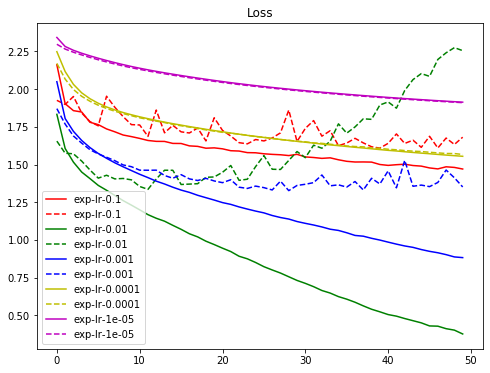

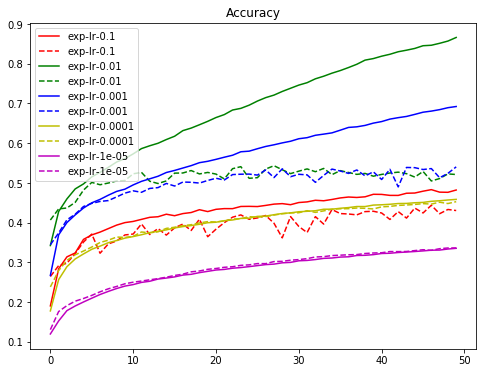

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()